In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [24]:
CURRENT = Path(r"C:\Users\ABHIVARUN\DATA\data").parent
DATA = CURRENT / "data"

In [25]:
basic = pd.read_csv(DATA / "basic.csv")

In [26]:
basic = pd.read_csv(
    DATA / "basic.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID",
)

In [27]:
basic.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


In [19]:
 hw_grades = pd.read_csv(DATA / "hw_grades.csv")

In [21]:
hw_grades = pd.read_csv(
    DATA / "hw_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID",
)

In [22]:
hw_grades.head()

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100


In [32]:
quiz_grades = pd.DataFrame()
for file_path in DATA.glob("*-quiz.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [33]:
quiz_grades.head()

,1-Quiz,2-Quiz,3-Quiz,4-Quiz,5-Quiz
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [35]:
total_data = pd.merge(
    basic,
    hw_grades,
    left_index=True,
    right_index=True,
)
total_data = pd.merge(
    total_data, quiz_grades, left_on="Email Address", right_index=True
)
total_data = total_data.fillna(0)

In [36]:
print(total_data)

                      Email Address  Section First Name Last Name  Homework 1  \
wxb12345  woody.barrera_jr@univ.edu        1      Woody   Barrera        55.0   
mxl12345   malaika.lambert@univ.edu        2    Malaika   Lambert        63.0   
txj12345       traci.joyce@univ.edu        1      Traci     Joyce         0.0   
jgf12345   john.g.2.flower@univ.edu        3      Gregg    Flower        69.0   
smj00936     stacy.johnson@univ.edu        2      Stacy   Johnson        74.0   
...                             ...      ...        ...       ...         ...   
pmj37756      paul.johnson@univ.edu        3       Paul   Johnson        73.0   
dsl24347      danielle.lee@univ.edu        3   Danielle       Lee        69.0   
nxe44872    nicole.edwards@univ.edu        3     Nicole   Edwards        62.0   
bxr62103      bailey.reyes@univ.edu        2     Bailey     Reyes        53.0   
jxw53347       joyce.walls@univ.edu        1      Joyce     Walls        59.0   

          Homework 1 - Max 

In [37]:
n_exams = 3
for n in range(1, n_exams + 1):
    total_data[f"Exam {n} Score"] = (
        total_data[f"Exam {n}"] / total_data[f"Exam {n} - Max Points"]
    )
homework_scores = total_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = total_data.filter(regex=r"^Homework \d\d? -", axis=1)
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
total_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
total_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]
total_data["Homework Score"] = total_data[
    ["Total Homework", "Average Homework"]
].max(axis=1)
quiz_scores = total_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)
sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
total_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max
average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
total_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]
total_data["Quiz Score"] = total_data[
    ["Total Quizzes", "Average Quizzes"]
].max(axis=1)
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

total_data["Final Score"] = (total_data[weightings.index] * weightings).sum(
    axis=1
)
total_data["Ceiling Score"] = np.ceil(total_data["Final Score"] * 100)

grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    """Map numerical grade to letter grade."""
    for key, letter in grades.items():
        if value >= key:
            return letter
letter_grades = total_data["Ceiling Score"].map(grade_mapping)
total_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

In [38]:
print(letter_grades)

wxb12345    F
mxl12345    D
txj12345    F
jgf12345    F
smj00936    F
           ..
pmj37756    F
dsl24347    F
nxe44872    F
bxr62103    F
jxw53347    F
Name: Ceiling Score, Length: 150, dtype: object


In [40]:
for section, table in final_data.groupby("Section"):
    section_file = DATA / f"grades of section {section}.csv"
    num_students = table.shape[0]
    print(
        f"there are {num_students} students in section {section} saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

there are 56 students in section 1 saved to file C:\Users\ABHIVARUN\DATA\data\grades of section 1.csv.
there are 51 students in section 2 saved to file C:\Users\ABHIVARUN\DATA\data\grades of section 2.csv.
there are 43 students in section 3 saved to file C:\Users\ABHIVARUN\DATA\data\grades of section 3.csv.


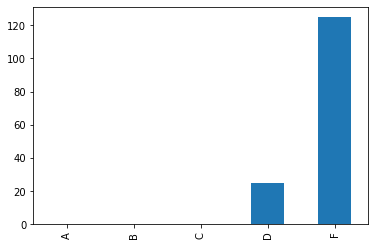

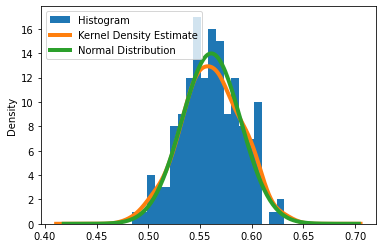

In [49]:
total_grade_counts = total_data["Final Grade"].value_counts().sort_index()
total_grade_counts.plot.bar()
plt.show()

total_data["Final Score"].plot.hist(bins=20, label="Histogram")
total_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)

total_mean = total_data["Final Score"].mean()
total_std = total_data["Final Score"].std()
x = np.linspace(total_mean - 5 * total_std, total_mean + 5 * total_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=total_mean, scale=total_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()